In [1]:
from PIL import Image, ImageOps, ImageFilter
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

(1920, 1080) RGB


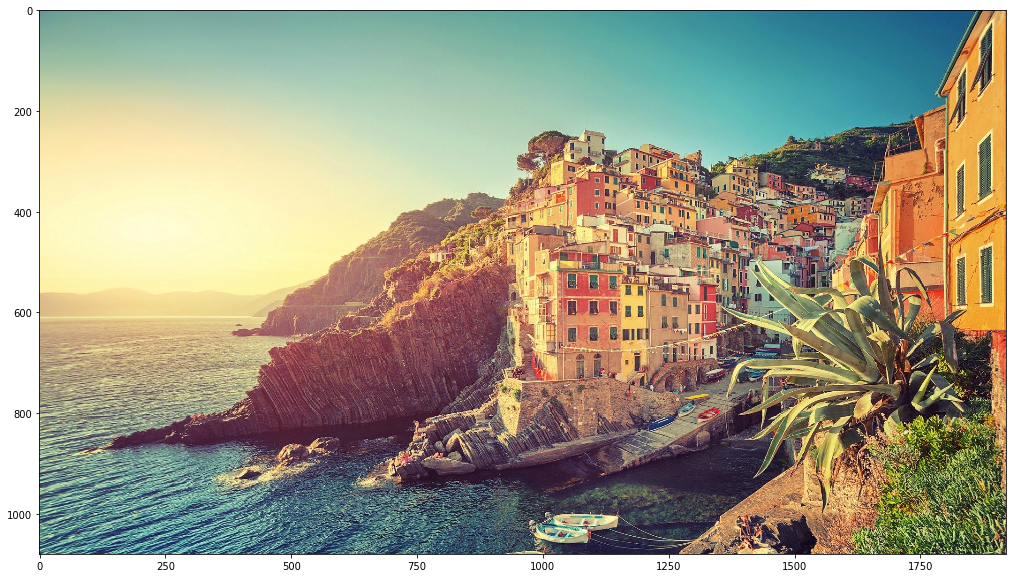

In [2]:
im1 = Image.open("D:/Images/Town.jpg")
print(im1.size, im1.mode)
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(im1)

(2048, 1356) L


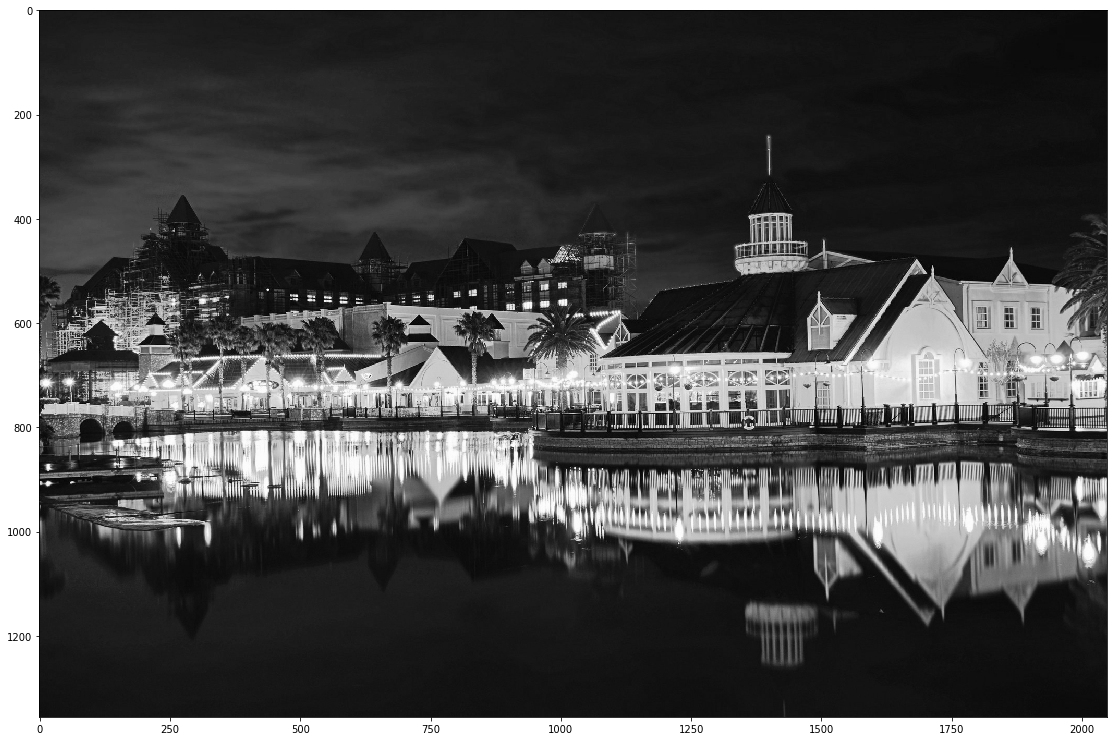

In [4]:
im2 = Image.open("D:/Images/House.jpg")
im2 = ImageOps.grayscale(im2)
print(im2.size, im2.mode)
im2.save("d:/Images/House_gray.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100))
plt.imshow(im2, cmap='gray')

In [5]:
colors = ['red', "green", 'blue']
def show_hists(name, image, overflow = False):
    len_hist=[i for i in range(256)]
    fig, xy = plt.subplots(1, 3, figsize=(15,5), sharex = True, sharey = True)
    for num, channel in enumerate(image.split()):
        ch_data = np.bincount(np.array(channel.getdata()))
        if(ch_data.shape[0]<256):
            ch_data = np.append(ch_data, [0] * (256 - ch_data.shape[0]))
        if overflow:
            ch_data[255] = 0
        xy[num].set_ylim(top=25000)
        xy[num].bar(len_hist, ch_data, color = colors[num])
        xy[num].title.set_text(name)
    plt.show()
    
def show_hist(name, image, overflow = False):
    len_hist=[i for i in range(256)]
    gr = np.bincount(np.array(image.getdata()))
    if(gr.shape[0]<256):
        gr = np.append(gr, [0] * (256 - gr.shape[0]))
    if overflow:
        gr[255] = 0
    plt.figure(figsize=(8,5))
    plt.bar(len_hist, gr, color = 'gray')
    plt.title(name)
    plt.show()

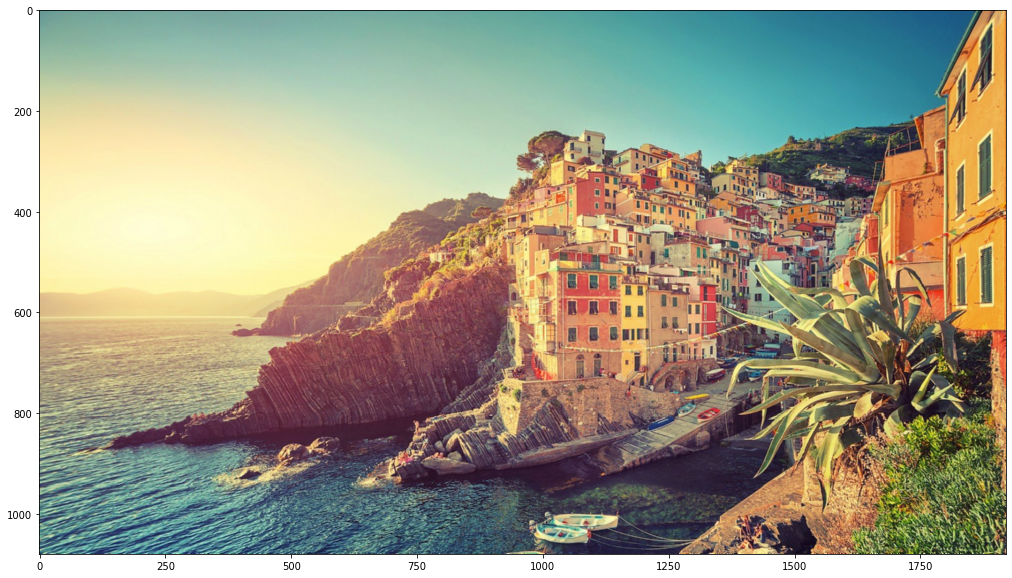

In [7]:
km1 = (
     1, 1, 1,
     1, 1, 1,
     1, 1, 1
      )
k1 = ImageFilter.Kernel(
    size=(3, 3),
    kernel=km1,
    scale=sum(km1),  # default
    offset=0  # default
    )
f_im1 = im1.filter(k1)
f_im1.save("d:/Images/Town_F.jpg")
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(f_im1)

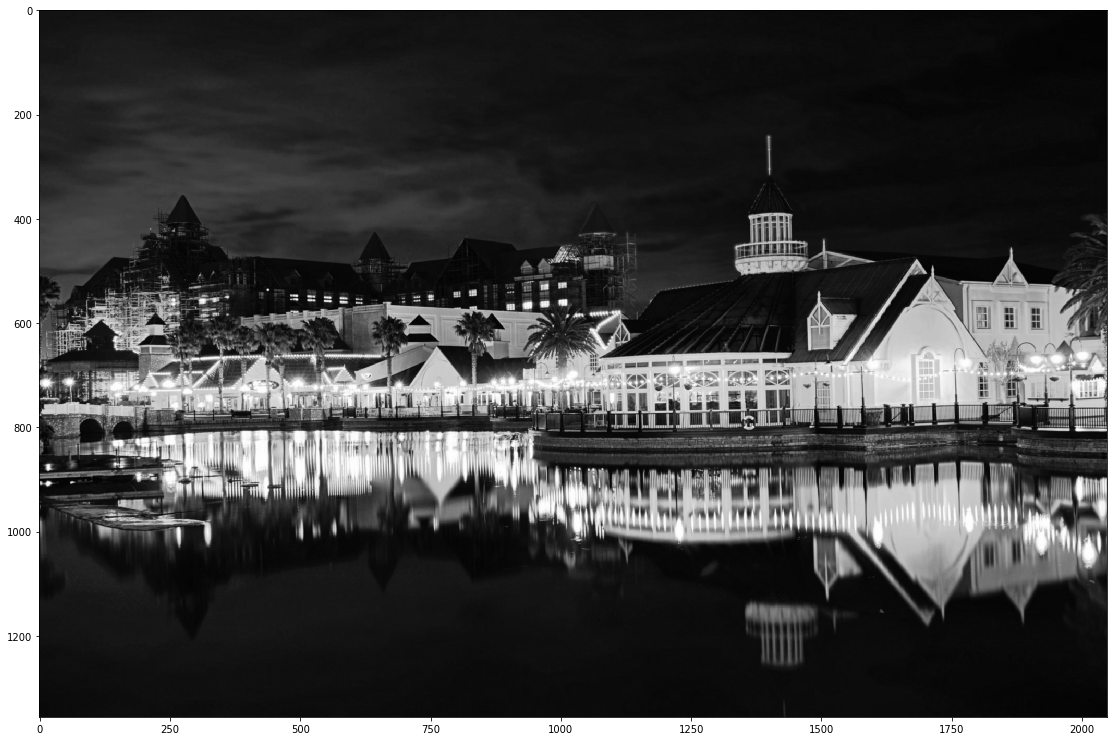

In [8]:
km2 = (
     1, 2, 1,
     2, 4, 2,
     1, 2, 1
      )
k2 = ImageFilter.Kernel(
    size=(3, 3),
    kernel=km2,
    scale=sum(km2),  # default
    offset=0  # default
    )
f_im2 = im2.filter(k2)
f_im2.save("d:/Images/House_f.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100 ))
plt.imshow(f_im2, cmap='gray')

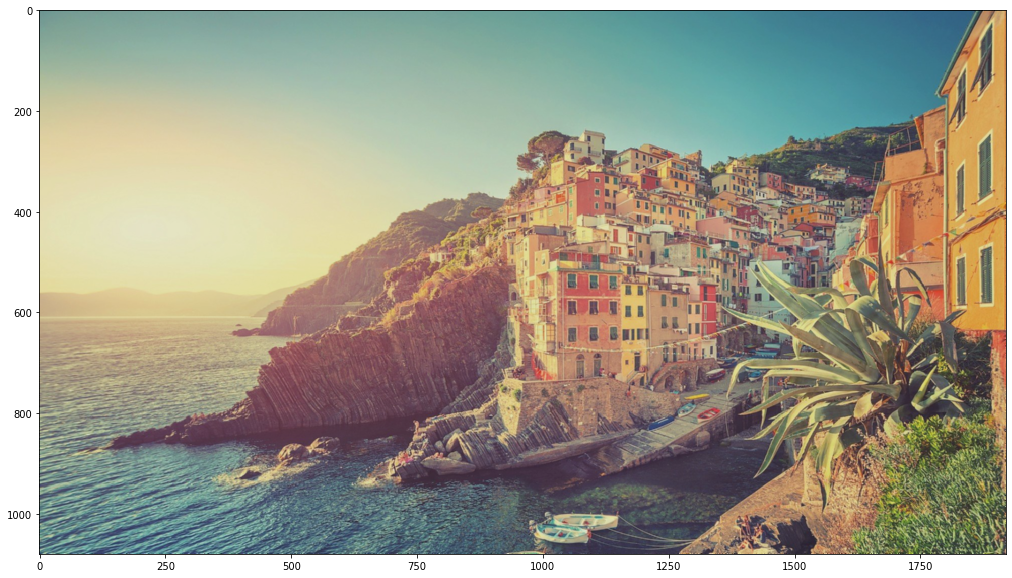

In [13]:
gmax = 230
gmin = 30
c_im1 = Image.eval(f_im1, lambda px: px/256*(gmax-gmin)+gmin)
c_im1.save("d:/Images/Town_C.jpg")
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(c_im1)

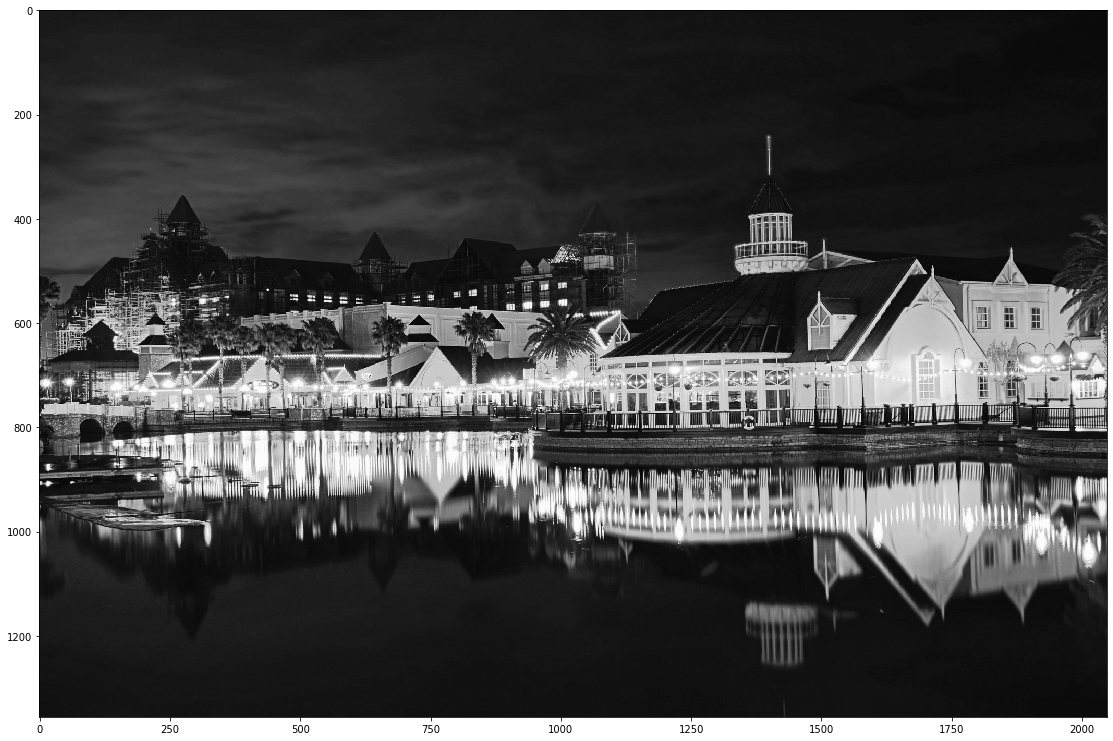

In [10]:
gmax = 250
gmin = 10
c_im2 = Image.eval(im2, lambda px: px/256*(gmax-gmin)+gmin)
c_im2.save("d:/Images/House_C.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100 ))
plt.imshow(c_im2, cmap='gray')

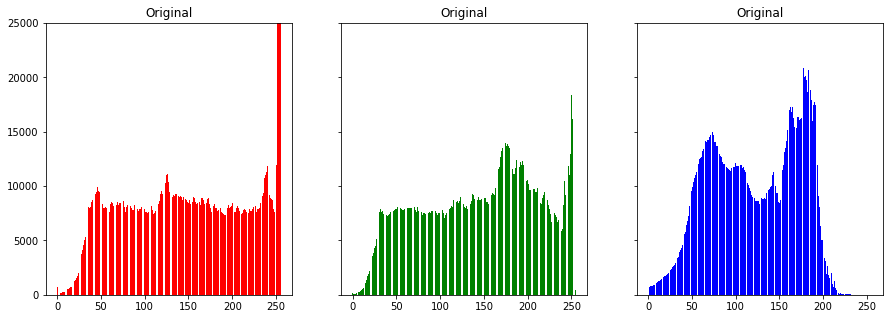

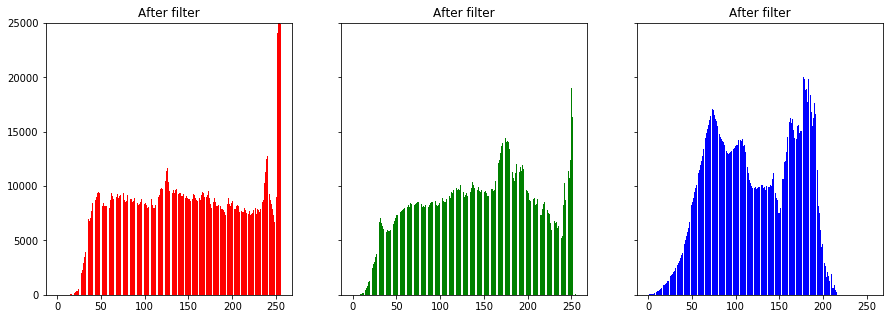

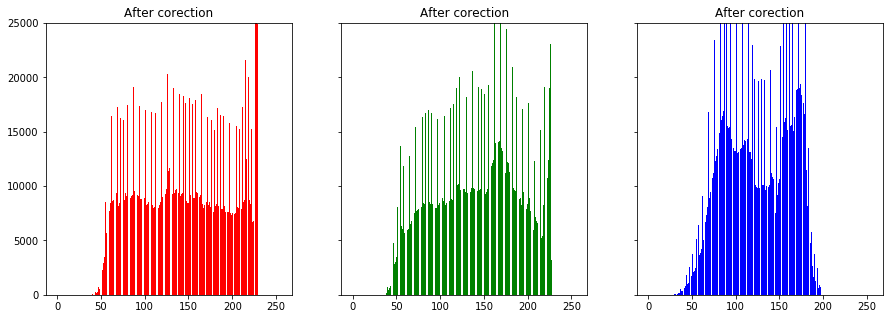

In [14]:
show_hists('Original', im1)
show_hists('After filter', f_im1)
show_hists('After corection', c_im1, overflow = True)

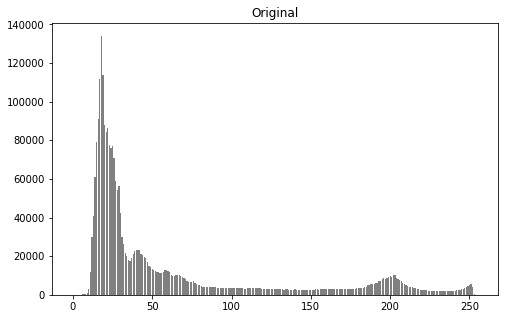

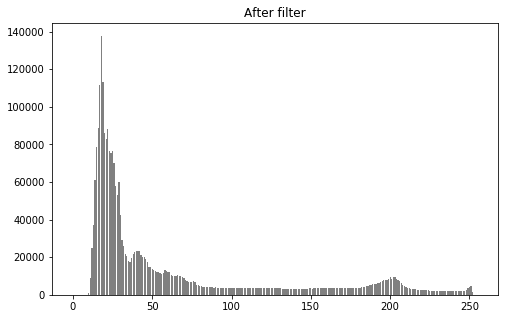

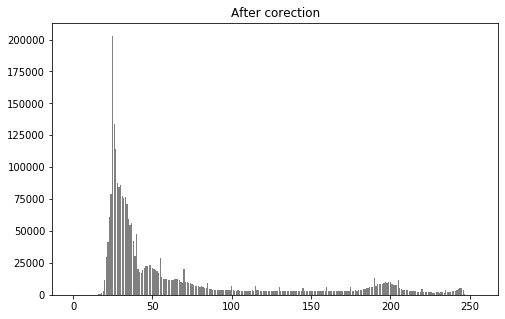

In [12]:
show_hist('Original', im2)
show_hist('After filter', f_im2)
show_hist('After corection', c_im2)